In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
#print(train_df)

In [5]:
#1 
# Подсчет выживших/погибших по полу и классу
survival_stats = train_df.groupby(['Pclass', 'Sex'])['Survived'].value_counts()
print(survival_stats)


Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: count, dtype: int64


In [ ]:
#2  Вывод статистики по числовым полям, разделенной по полу
male_stats = train_df[train_df['Sex'] == 'male'].describe()
female_stats = train_df[train_df['Sex'] == 'female'].describe()

print("Статистика для мужчин:\n", male_stats)
print("\nСтатистика для женщин:\n", female_statas)


Статистика для мужчин:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   577.000000  577.000000  577.000000  453.000000  577.000000   
mean    454.147314    0.188908    2.389948   30.726645    0.429809   
std     257.486139    0.391775    0.813580   14.678201    1.061811   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     222.000000    0.000000    2.000000   21.000000    0.000000   
50%     464.000000    0.000000    3.000000   29.000000    0.000000   
75%     680.000000    0.000000    3.000000   39.000000    0.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  577.000000  577.000000  
mean     0.235702   25.523893  
std      0.612294   43.138263  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   10.500000  
75%      0.000000   26.550000  
max      5.000000  512.329200  

Статистика для женщин:
        PassengerId    Survived  

In [ ]:
#3 Анализ влияния порта посадки на выживаемость
embark_survival = train_df.groupby('Embarked')['Survived'].mean() #mean() вычисляет среднее значение по каждому набору данных внутри группы.
print(embark_survival)


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [ ]:
#4 Извлечение имен и фамилий
train_df['Last_Name'] = train_df['Name'].apply(lambda x: x.split(',')[0])
train_df['First_Name'] = train_df['Name'].apply(lambda x: x.split(',')[1].split()[1] if len(x.split(',')[1].split()) > 1 else x.split(',')[1].split()[0]) #без учета по типу mr и тд

# Топ 10 популярных имен
top_first_names = train_df['First_Name'].value_counts().head(10)
print("Топ 10 популярных имен:")
for name, count in top_first_names.items():
    print(f"{name}: {count}")

# Топ 10 популярных фамилий

top_last_names = train_df['Last_Name'].value_counts().head(10)
print("\nТоп 10 популярных фамилий:")
for name, count in top_last_names.items():
    print(f"{name}: {count}")


Топ 10 популярных имен:
William: 48
John: 31
Thomas: 19
Charles: 16
George: 16
James: 15
Henry: 15
Frederick: 13
Edward: 13
Richard: 11

Топ 10 популярных фамилий:
Andersson: 9
Sage: 7
Panula: 6
Skoog: 6
Carter: 6
Goodwin: 6
Johnson: 6
Rice: 5
Lefebre: 4
Asplund: 4


In [21]:
train_df = pd.read_csv('train.csv')
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#5
# train_df = pd.read_csv('train.csv')

train_df.fillna(train_df.median(numeric_only=True), inplace=True)


train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Cabin'].fillna(train_df['Cabin'].mode()[0], inplace=True)

# Проверка на наличие пропусков
print(train_df.isnull().sum())  # Все пропуски должны быть заполнены


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\Семен\AppData\Local\Temp\ipykernel_11484\1380349081.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
C:\Users\Семен\AppData\Local\Temp\ipykernel_11484\1380349081.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [22]:
#6 Предсказание 
test_df['Survived'] = 0  # Начнем с предположения, что все погибли
test_df.loc[(test_df['Sex'] == 'female') | ((test_df['Pclass'] == 1) | (test_df['Pclass'] == 2)), 'Survived'] = 1 #(выживают все женщины из 1 и 2 классов)

# Сохранение результатов в файл
test_df[['PassengerId', 'Survived']].to_csv('submission.csv', index=False)
print("Предсказания сохранены в submission.csv")


Предсказания сохранены в submission.csv


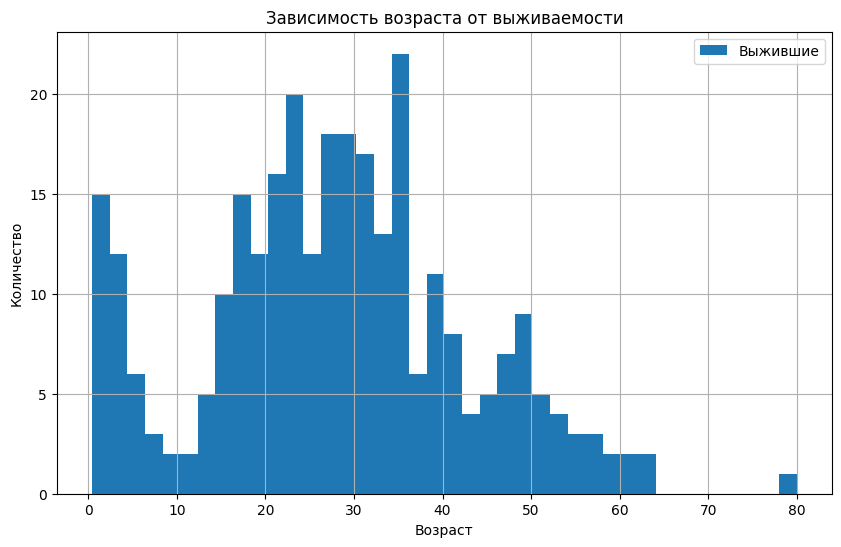

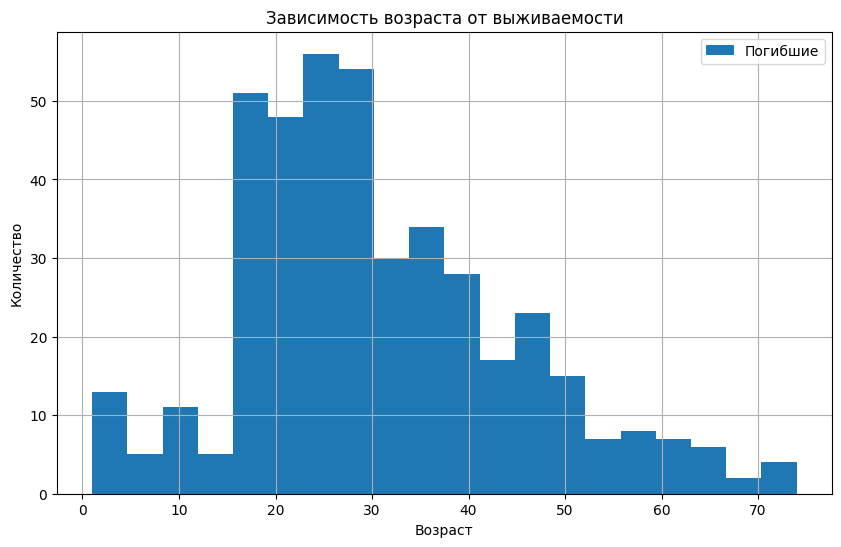

In [25]:
#7 Построение гистограммы
plt.figure(figsize=(10, 6))
train_df[train_df['Survived'] == 1]['Age'].hist(bins=40, label='Выжившие')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Зависимость возраста от выживаемости')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
train_df[train_df['Survived'] == 0]['Age'].hist(bins=20, label='Погибшие')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Зависимость возраста от выживаемости')
plt.legend()
plt.show()
